In [ ]:
import os

from fastai.data.external import untar_data, URLs

import torch
import torchvision
from torch.utils.data import random_split

Downloading data

In [ ]:
data_dir = untar_data(URLs.CIFAR)
data_dir = str(data_dir)

Checking all the directories in the data downloaded and checking the classes 

In [ ]:
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['labels.txt', 'test', 'train']
['horse', 'ship', 'frog', 'automobile', 'dog', 'bird', 'deer', 'truck', 'airplane', 'cat']


In [ ]:
classes = os.listdir(data_dir + "/test")
print(classes)

['horse', 'ship', 'frog', 'automobile', 'dog', 'bird', 'deer', 'truck', 'airplane', 'cat']


Printing the names of the image files 

In [ ]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['14592_airplane.png', '28467_airplane.png', '3815_airplane.png', '12785_airplane.png', '8155_airplane.png']


In [ ]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['3037_ship.png', '385_ship.png', '6779_ship.png', '3515_ship.png', '6526_ship.png']


Plotting random images from the dataset of each of the 10 classes 

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Plots different images at every run

In [ ]:
def show_images(dataset='train'):
    next_pix= []
    # Parameters for our graph; we'll output images in a 5x2 configuration
    nrows = 5
    ncols = 2

    fig = plt.gcf()
    fig.set_size_inches(ncols * 5, nrows * 5)
    for i in range(len(classes)):
        next_pix.append(os.path.join(data_dir,dataset,classes[i]))
        img = mpimg.imread(os.path.join(next_pix[i],random.choice(os.listdir(next_pix[i]))))
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)
        plt.imshow(img)
        plt.title(classes[i])

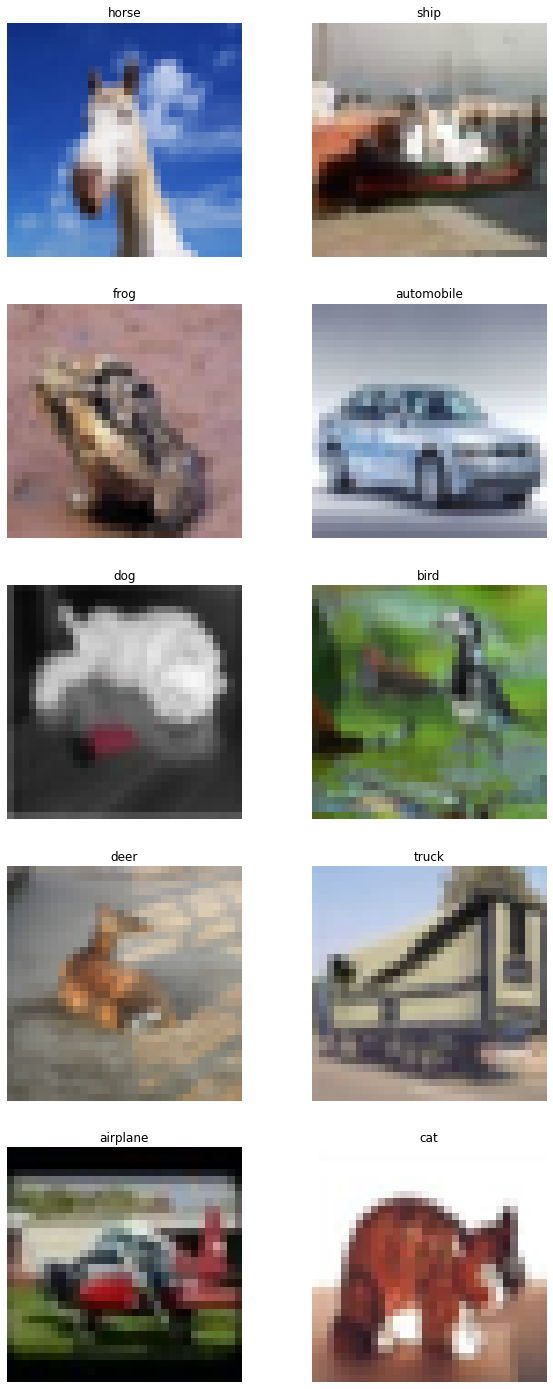

In [ ]:
show_images('test')

Transofrming images to tensor

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=transforms.ToTensor())

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
         [0.9686, 0.9686, 0.9765,  ..., 0.9569, 0.9529, 0.

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Changing tensor dimensions to h,w,c using permute. Permute shifts the channels

In [ ]:
def show_example(img, label):
    #print('Label: ', dataset.classes[label], "("+str(label)+")")
    print('Label No. : '+str(label))
    plt.title(dataset.classes[label])
    plt.imshow(img.permute(1, 2, 0))

  (*) sends tuple 

Label No. : 1


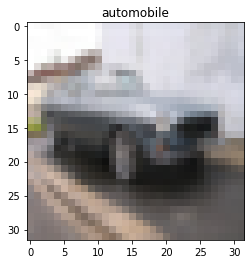

In [ ]:
show_example(*dataset[5949])

Label No. : 0


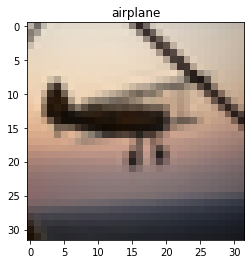

In [ ]:
show_example(*dataset[1049])

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

Splitting the dataset

In [ ]:
val_size = int(len(dataset)*0.10)
train_size = int(len(dataset) - val_size)  
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

Creating DataLoader to send images in batches

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=256

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Making grid of a batch to check the dataset

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(30, 15))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

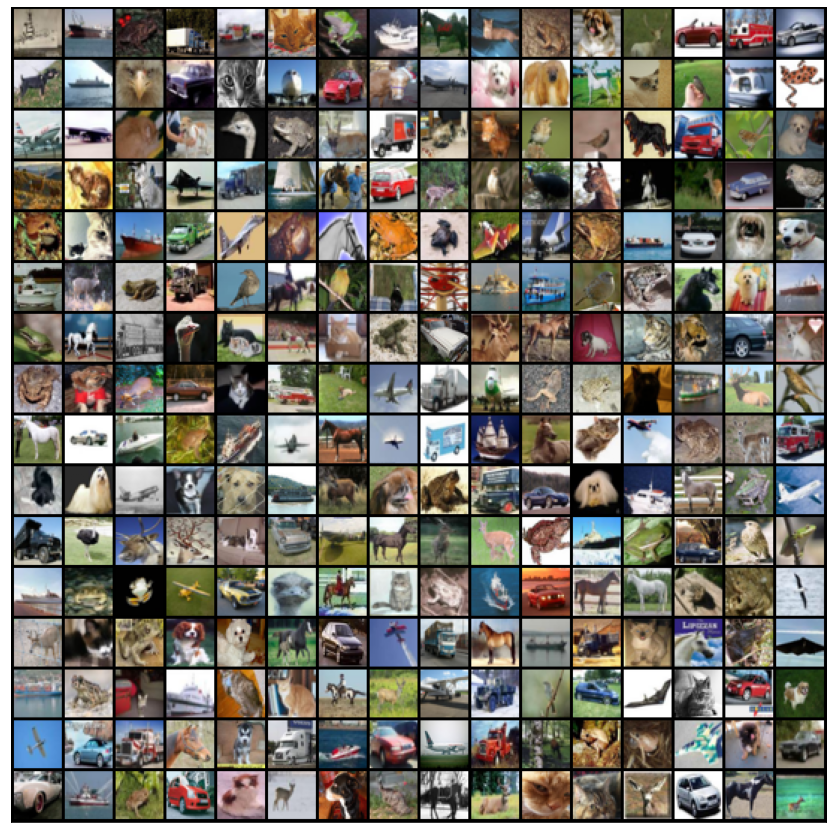

In [ ]:
show_batch(train_dl)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

using an example to get the output size of the the CNN to calculate the input size for the Linear after flattening

In [ ]:
simple_model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
)

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([256, 3, 32, 32])
out.shape: torch.Size([256, 128, 4, 4])


Defining functions for calculating accuracy and Loss

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels)  
        return loss,acc
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['train_accuracy'], result['val_loss'], result['val_acc']))
        

Defining the CNN model

In [ ]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 4 x 4

            nn.Flatten(),
            nn.Dropout(p=0.3),
            nn.Linear(128*4*4, 128),
            nn.ReLU(),
            nn.Linear(128, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), 

Checking output of the model

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([256, 3, 32, 32])
out.shape: torch.Size([256, 10])
out[0]: tensor([ 0.5547,  0.2681, -0.0310,  0.0083,  0.2380, -0.1966, -0.2871, -0.1305,
        -0.4444,  0.0470], grad_fn=<SelectBackward0>)


Installing torchinfo to check no. parameters of the layers

In [ ]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from torchinfo import summary

summary(model, input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Cifar10CnnModel                          [256, 10]                 --
├─Sequential: 1-1                        [256, 10]                 --
│    └─Conv2d: 2-1                       [256, 32, 32, 32]         896
│    └─BatchNorm2d: 2-2                  [256, 32, 32, 32]         64
│    └─ReLU: 2-3                         [256, 32, 32, 32]         --
│    └─Conv2d: 2-4                       [256, 64, 32, 32]         18,496
│    └─BatchNorm2d: 2-5                  [256, 64, 32, 32]         128
│    └─ReLU: 2-6                         [256, 64, 32, 32]         --
│    └─MaxPool2d: 2-7                    [256, 64, 16, 16]         --
│    └─Conv2d: 2-8                       [256, 128, 16, 16]        73,856
│    └─BatchNorm2d: 2-9                  [256, 128, 16, 16]        256
│    └─ReLU: 2-10                        [256, 128, 16, 16]        --
│    └─Conv2d: 2-11                      [256, 128, 16, 16]        147,584

Checking the Device available and moving the model and dataset to that device

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), 

Defining the evaluation function and the fit function for backpropagation and model training

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func
    for epoch in (range(epochs)):
        # Training Phase 
        model.train()
        train_losses = []
        train_accuracy= []
        for (batch_idx, batch) in enumerate(train_loader):
            loss,accuracy = model.training_step(batch)
            train_losses.append(loss)
            train_accuracy.append(accuracy)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if batch_idx % 50 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accuracy: {:.4f}'.
                format(epoch+1, batch_idx , len(train_loader),
                       100. * batch_idx / len(train_loader), loss,accuracy))
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_accuracy'] = torch.stack(train_accuracy).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(Cifar10CnnModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_loss': 2.3044841289520264, 'val_acc': 0.09701450914144516}

In [ ]:
num_epochs = 15
lr = 0.001
opt_func = torch.optim.Adam(model.parameters(),lr,amsgrad=True)

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Train Epoch: 1 [0/176 (0%)]	Loss: 2.334867, Accuracy: 0.0781
Train Epoch: 1 [50/176 (28%)]	Loss: 1.374844, Accuracy: 0.4375
Train Epoch: 1 [100/176 (57%)]	Loss: 1.224840, Accuracy: 0.5547
Train Epoch: 1 [150/176 (85%)]	Loss: 1.052808, Accuracy: 0.6133
Epoch [1], train_loss: 1.3618, train_acc: 0.5007, val_loss: 1.1338, val_acc: 0.5990
Train Epoch: 2 [0/176 (0%)]	Loss: 1.140962, Accuracy: 0.5938
Train Epoch: 2 [50/176 (28%)]	Loss: 0.965196, Accuracy: 0.6680
Train Epoch: 2 [100/176 (57%)]	Loss: 0.873373, Accuracy: 0.6719
Train Epoch: 2 [150/176 (85%)]	Loss: 0.774622, Accuracy: 0.7461
Epoch [2], train_loss: 0.9252, train_acc: 0.6705, val_loss: 0.9007, val_acc: 0.6853
Train Epoch: 3 [0/176 (0%)]	Loss: 0.715173, Accuracy: 0.7383
Train Epoch: 3 [50/176 (28%)]	Loss: 0.815062, Accuracy: 0.7148
Train Epoch: 3 [100/176 (57%)]	Loss: 0.787685, Accuracy: 0.7266
Train Epoch: 3 [150/176 (85%)]	Loss: 0.761100, Accuracy: 0.7539
Epoch [3], train_loss: 0.7394, train_acc: 0.7375, val_loss: 0.7855, val_acc:

In [ ]:
def plot_accuracies(history):
    train_accuracies= [x['train_accuracy'] for x in history]
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-bx')
    plt.plot(train_accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Validation','Training'])
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

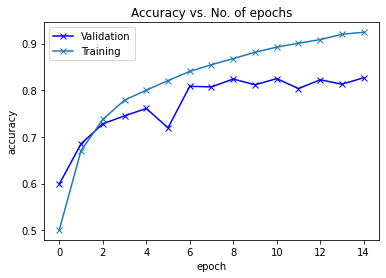

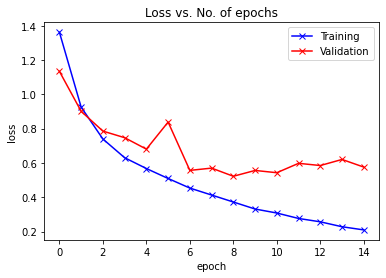

In [ ]:
plot_accuracies(history)
plt.show()
plot_losses(history)

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=transforms.ToTensor())

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6032282114028931, 'val_acc': 0.8226102590560913}

Saving and Loading the model

In [ ]:
torch.save(model.state_dict(), '/kaggle/working/cifar10-cnn.pth')

In [ ]:
model2 = to_device(Cifar10CnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('/kaggle/working/cifar10-cnn.pth'))

<All keys matched successfully>

Sanity Check

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 0.6032282114028931, 'val_acc': 0.8226102590560913}

Creating function for prediction of a single image

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    model.eval()
    with torch.no_grad():
        yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]


Label: frog , Predicted: frog


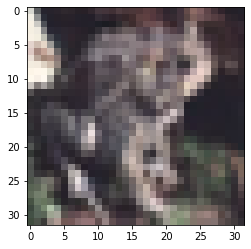

In [ ]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))